# Mass spectrometry

# Introduction

**Mass spectrometry** is technique to analyze molecules based on their mass (mass to charge ratio, to be precise). First step is to ionize molecules. Later they are separated in space, after which they go to detector. Using mass spectrometry, one can determine:

    o Composition of unknown sample
    o Isotopic structure of sample
    o Structure of molecules
    o Molar mass of molecules
    o Quantity of specified matter in sample
    o Physical and chemical properties of matter
 
Ionizator may cause fragmentation of molecules, which is useful to determine composition of molecules. Common ways of ionization are: 
    
    o Fast atom bombardment, Fast ion bombardment
        Using atoms or ions with energy ~keV, usually argon, xenon. 
    o Chemical ionization
        Sample in gas state is mixed with other matter in gas state, which is later bombed with electrons. 
    o Electro-Spray ionization
    o Matrix-assisted laser desorption/ionization
        Sample is dissolved in matrix, which is later acted by laser. Matrix protects sample from laser. By evaporation, matrix ionize sample. 
        
For spectral analysis, magnetic sector analyzators are used. Using two holes, we select which ions go in and out. 

# Preprocessing

In [1]:
# Libraries...

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load data... lucky for us, numpy handles .dat files as well :)

data_1 = np.loadtxt("../data/Spectar I.dat")
data_2 = np.loadtxt("../data/Spectar II.dat")

### Plot data

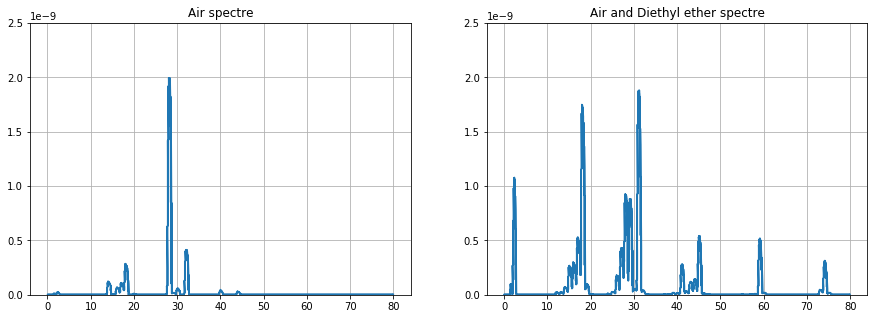

In [3]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

for i in range(2):
    ax[i].set_ylim(-1e-13, 2.5e-9)
    ax[i].grid()

ax[0].set_title("Air spectre")
ax[1].set_title("Air and Diethyl ether spectre")

ax[0].plot(data_1[:,0], data_1[:,1])
ax[1].plot(data_2[:,0], data_2[:,1])

### Identification

In air spectre, we identify maxima at: ...

In [14]:
# Put them into dictionary...

dict_air = {
    "mass": 
        np.array([
            2.04,
            14.07, 
            16.047,
            17.091,
            17.791,
            28.14, 
            30.93, 
            31.977, 
            40.930, 
            43.953
        ]),
    "intensity": 
        np.array([
            2.794e-11,
            1.2375e-10, 
            7.1856e-11,
            1.1176e-10,
            2.1956e-10, 
            1.996e-9, 
            5.988e-11, 
            4.1517e-10, 
            4.7904e-11, 
            3.5928e-11
        ]),
    "formula": [
        "H2+",
        "N-", 
        "O-", 
        "OH-",
        "H2O",
        "N2", 
        "NO", 
        "O2", 
        "Ar", 
        "CO2"
        ]
}

In diethyl ethre and air spectre, we identify maxima at: ...

In [31]:
dict_de_and_air = {
    "mass": 
        np.array([
            2.3973, 
            14.024, 
            15.103, 
            15.942, 
            17.021, 
            17.979, 
            26.010, 
            27.209, 
            28.048, 
            29.007, 
            3.1164e+01, 
            4.1113e+01,
            4.3953e+01,
            4.3985e+01,
            4.5068e+01,
            5.9092e+01,
            7.4075e+01
        ]),
    "intensity": 
        np.array([
            1.0798e-09, 
            7.3620e-11, 
            2.6994e-10, 
            3.0266e-10, 
            5.3170e-10, 
            1.7505e-09, 
            1.8405e-10, 
            4.3354e-10, 
            9.2843e-10, 
            8.8344e-10, 
            1.8814e-09, 
            2.8221e-10,
            1.1941e-10,
            1.2011e-10,
            5.4397e-10, 
            5.1943e-10,
            3.1493e-10
        ]),
    "formula": [
        "H2+", 
        "N-", 
        "CH3-", 
        "O-", 
        "OH-", 
        "H2O", 
        "C2H3-" 
        "C2H4", 
        "N2", 
        "CH3-CH2-", 
        "CH3-O-", 
        "C3H5", 
        "CO2", 
        "C3H7-", 
        "C3H8", 
        "CH3-CH2-O-",
        "CH3-CH2-O-CH2-",
        "C4H10O"
    ]
}

### Identification helper block...

[7.4075e+01 3.1493e-10]


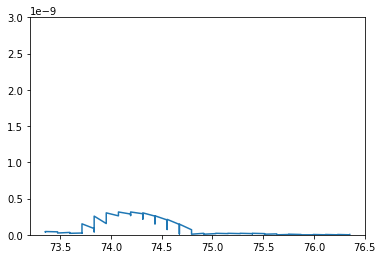

In [5]:
fig_1, ax_1 = plt.subplots()

ax_1.set_ylim(0, 3e-9)

l = 73.3
r = 76.4
x = data_2[(data_2[:,0] > l) & (data_2[:,0] < r)]
arg = np.argmax(data_2[:,1][(data_2[:,0] > l) & (data_2[:,0] < r)])
print(data_2[(data_2[:,0] > l) & (data_2[:,0] < r)][arg,:])

ax_1.plot(x[:,0], x[:,1])

### Calculate parts

In [32]:
air_total_intensity = dict_air["intensity"].sum()

In [33]:
dict_air["percentage"] = dict_air["intensity"] / air_total_intensity

In [34]:
df_air = pd.DataFrame(dict_air)
df_air

,mass,intensity,formula,percentage
0,2.040,2.794000e-11,H2,0.008985
1,14.070,1.237500e-10,N-,0.039794
2,16.047,7.185600e-11,O-,0.023107
3,17.091,1.117600e-10,OH-,0.035939
4,17.791,2.195600e-10,H2O,0.070604
5,28.140,1.996000e-09,N2,0.641853
6,30.930,5.988000e-11,NO,0.019256
7,31.977,4.151700e-10,O2,0.133506
8,40.930,4.790400e-11,Ar,0.015404
9,43.953,3.592800e-11,CO2,0.011553


In [35]:
ratio = 1.8814e-09 / 4.151700e-10

In [36]:
de_and_air_total_intensity = dict_de_and_air["intensity"].sum()
dict_de_and_air["percentage"] = dict_de_and_air["intensity"] / de_and_air_total_intensity

In [38]:
df_de_and_air = pd.DataFrame(dict_de_and_air)
df_de_and_air

,mass,intensity,formula,percentage
0,2.3973,1.079800e-09,H2+,0.105664
1,14.0240,7.362000e-11,N-,0.007204
2,15.1030,2.699400e-10,CH3-,0.026415
3,15.9420,3.026600e-10,O-,0.029617
4,17.0210,5.317000e-10,OH-,0.052030
5,17.9790,1.750500e-09,H2O,0.171296
6,26.0100,1.840500e-10,C2H3-C2H4,0.018010
7,27.2090,4.335400e-10,N2,0.042424
8,28.0480,9.284300e-10,CH3-CH2-,0.090852
9,29.0070,8.834400e-10,CH3-O-,0.086450


# Analysis

In [39]:
air_composition = df_air.formula.values

In [40]:
d_and_a_composition = df_de_and_air.formula.values

In [41]:
d_and_a_composition

array(['H2+', 'N-', 'CH3-', 'O-', 'OH-', 'H2O', 'C2H3-C2H4', 'N2',
       'CH3-CH2-', 'CH3-O-', 'C3H5', 'CO2', 'C3H7-', 'C3H8', 'CH3-CH2-O-',
       'CH3-CH2-O-CH2-', 'C4H10O'], dtype=object)

In [42]:
air_composition

array(['H2', 'N-', 'O-', 'OH-', 'H2O', 'N2', 'NO', 'O2', 'Ar', 'CO2'],
      dtype=object)

In [81]:
idx = (elem not in air_composition for elem in d_and_a_composition)

In [68]:
#Finally, we have spectre of Diethyl ethre by removing elemets which occured in air spectre

df_de = df_de_and_air.loc[idx]

In [72]:
df_de.percentage = df_de.percentage / np.sum(df_de.percentage)

In [73]:
df_de

,mass,intensity,formula,percentage
0,2.3973,1.079800e-09,H2+,0.157752
2,15.1030,2.699400e-10,CH3-,0.039437
6,26.0100,1.840500e-10,C2H3-C2H4,0.026889
8,28.0480,9.284300e-10,CH3-CH2-,0.135638
9,29.0070,8.834400e-10,CH3-O-,0.129065
10,31.1640,1.881400e-09,C3H5,0.274861
12,43.9530,1.194100e-10,C3H7-,0.017445
13,43.9850,1.201100e-10,C3H8,0.017547
14,45.0680,5.439700e-10,CH3-CH2-O-,0.079471
15,59.0920,5.194300e-10,CH3-CH2-O-CH2-,0.075886


In [82]:
idx_ = (not el for el in idx)

In [83]:
# Common elements in spectra

air_in_de = df_de_and_air.loc[idx_]

In [86]:
df_air

,mass,intensity,formula,percentage
0,2.040,2.794000e-11,H2,0.008985
1,14.070,1.237500e-10,N-,0.039794
2,16.047,7.185600e-11,O-,0.023107
3,17.091,1.117600e-10,OH-,0.035939
4,17.791,2.195600e-10,H2O,0.070604
5,28.140,1.996000e-09,N2,0.641853
6,30.930,5.988000e-11,NO,0.019256
7,31.977,4.151700e-10,O2,0.133506
8,40.930,4.790400e-11,Ar,0.015404
9,43.953,3.592800e-11,CO2,0.011553


In [85]:
air_in_de

,mass,intensity,formula,percentage
1,14.024,7.362000e-11,N-,0.007204
3,15.942,3.026600e-10,O-,0.029617
4,17.021,5.317000e-10,OH-,0.052030
5,17.979,1.750500e-09,H2O,0.171296
7,27.209,4.335400e-10,N2,0.042424
11,41.113,2.822100e-10,CO2,0.027616


In [88]:
elements = air_in_de.formula.values

In [91]:
ratios = np.fromiter((
    df_air.loc[
        df_air.formula == formula
    ].intensity.values[0] for formula in air_in_de.formula.values
), dtype=np.float64)

In [92]:
ratios

array([1.2375e-10, 7.1856e-11, 1.1176e-10, 2.1956e-10, 1.9960e-09,
       3.5928e-11])

# Conclusion

Since ratios of common peaks in both air and diethyl ethre do not have any pattern, we cannot conclude how to norm second spectre to first and remove peaks.